In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
# Renaming the columns
df=df.rename(columns={"race/ethnicity": "race", "parental level of education": "parent_ed", "test preparation course": "course","math score":"math","writing score":"write","reading score":"read"})

In [3]:
df.dtypes

gender       object
race         object
parent_ed    object
lunch        object
course       object
math          int64
read          int64
write         int64
dtype: object

### Replacing "some high school" with "high school" as they both tend to mean the same thing.

In [4]:
df.loc[df.parent_ed=="some high school", 'parent_ed'] = "high school"

### Calculating aggregate total marks for analysis

In [5]:
# calculating total marks
df["sum"]=df["math"]+df["read"]+df["write"]

# Effect of gender on marks

### Effect on Maths

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


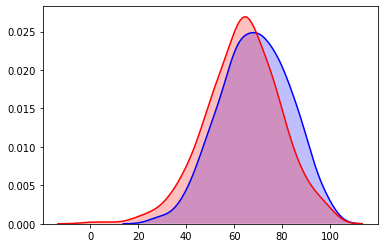

In [6]:
sns.kdeplot(df.loc[(df["gender"]=="male")]['math'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["gender"]=="female")]['math'],shade=True,color='r',legend=False)
df.groupby("gender")["math"].describe()

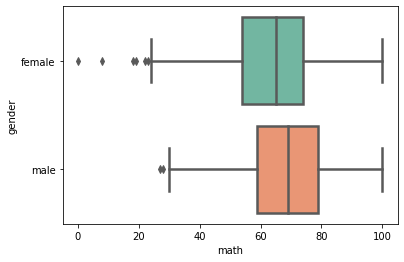

In [7]:
sns.boxplot(x="math",y="gender",data=df,linewidth=2.5,palette="Set2")

In the above KDE plot, the plot for females is by red color while plot for males is by red color.
It is evident that **males are much better in a maths test than females.** The median of males scores is 69 whereas those of females is 65. Also, the mean for male scores is 68.72 whereas for females it is 63.63.
**Also, the boy's plot in blue covers a larger portion in the right(towards higher marks) as compared to girls.**

### Effect on Reading scores

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


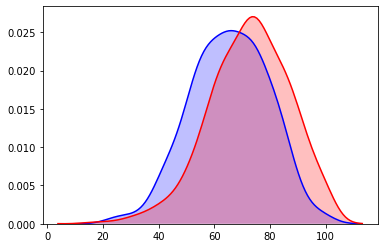

In [8]:
sns.kdeplot(df.loc[(df["gender"]=="male")]['read'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["gender"]=="female")]['read'],shade=True,color='r',legend=False)
df.groupby("gender")["read"].describe()

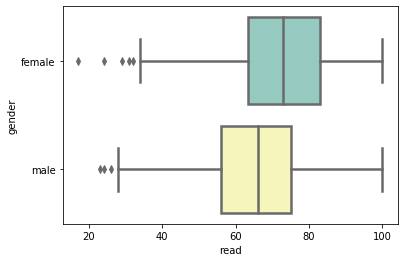

In [9]:
sns.boxplot(x="read",y="gender",data=df,linewidth=2.5,palette="Set3")

In the above KDE plot, the plot for females is by red color while plot for males is by red color.
It is evident that **females are much better in a reading evaluation than males.** The median of males scores is 66 whereas those of females is 73. Also, the mean for male scores is 65.47 whereas for females it is 72.6. Also, **the female's plot in red covers a larger portion in the right(towards higher marks) as compared to males.**

### Effect on Writing scores

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


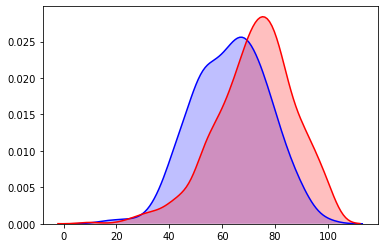

In [10]:
sns.kdeplot(df.loc[(df["gender"]=="male")]['write'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["gender"]=="female")]['write'],shade=True,color='r',legend=False)
df.groupby("gender")["write"].describe()

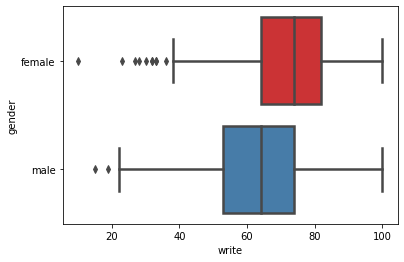

In [11]:
sns.boxplot(x="write",y="gender",data=df,linewidth=2.5,palette="Set1")

In the above KDE plot, the plot for females is by red color while plot for males is by red color.
It is evident that **females are significantly better in a writing evaluation than males.** The median of males scores is 64 whereas those of females is 74 (a huge difference of 10 marks). Also, the mean for male scores is 63.31 whereas for females it is 72.46. **Also, the female's plot in red covers a larger portion in the right(towards higher marks) as compared to males.**

### Effect of gender on overall marks

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,208.708494,43.625427,27.0,182.0,211.0,236.00,300.0
male,482.0,197.512448,41.096520,69.0,168.0,199.0,228.75,300.0


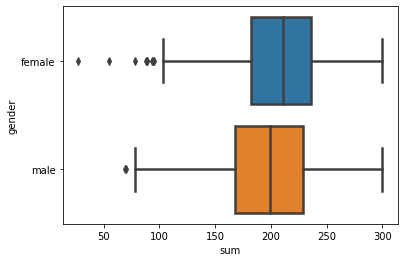

In [12]:
sns.boxplot(x="sum",y="gender",data=df,linewidth=2.5)
df.groupby("gender")["sum"].describe()

## Analysis
_**From the above plot, we can derive that the median scores of females is much higher than that of males.
Also, mean for females is 208,.7 whereas mean for males is 197.5**_

# Effect of parent's education

In [13]:
df["parent_ed"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [14]:
asc=["master's degree","bachelor's degree","associate's degree", 'some college','high school']

### Effect on maths scores

,count,mean,std,min,25%,50%,75%,max
parent_ed,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.0,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.0,68.0,79.0,100.0
high school,375.0,62.786667,15.212833,0.0,53.0,64.0,73.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.5,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.0,67.5,76.0,100.0


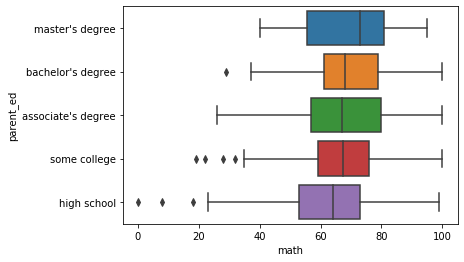

In [15]:
sns.boxplot(x="math",y="parent_ed",data=df,order=asc)
df.groupby("parent_ed")["math"].describe()

### Effect on reading scores

,count,mean,std,min,25%,50%,75%,max
parent_ed,,,,,,,,
associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,375.0,65.770667,14.812760,17.0,55.0,67.0,76.00,100.0
master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0


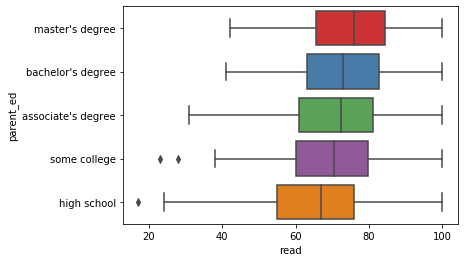

In [16]:
sns.boxplot(x="read", y="parent_ed", data=df,order=asc,palette="Set1")
df.groupby("parent_ed")["read"].describe()

### Effect on writing scores

,count,mean,std,min,25%,50%,75%,max
parent_ed,,,,,,,,
associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
high school,375.0,63.613333,14.926284,10.0,53.0,65.0,75.0,100.0
master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0


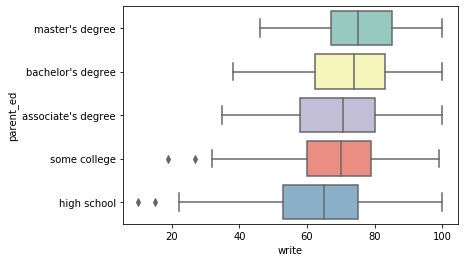

In [17]:
sns.boxplot(x="write", y="parent_ed", data=df,order=asc,palette="Set3")
df.groupby("parent_ed")["write"].describe()

## Effect on total scores

,count,mean,std,min,25%,50%,75%,max
parent_ed,,,,,,,,
associate's degree,222.0,208.707207,41.012743,95.0,176.00,209.0,237.0,300.0
bachelor's degree,118.0,215.771186,41.839827,117.0,192.25,213.5,242.0,300.0
high school,375.0,192.170667,42.747895,27.0,162.50,197.0,223.0,297.0
master's degree,59.0,220.796610,40.803051,134.0,189.50,220.0,256.5,293.0
some college,226.0,205.429204,41.132921,70.0,180.00,206.0,234.0,297.0


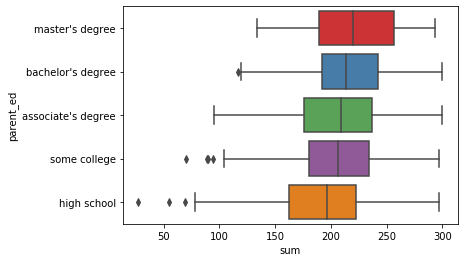

In [18]:
sns.boxplot(x="sum", y="parent_ed", data=df,order=asc,palette="Set1")
df.groupby("parent_ed")["sum"].describe()

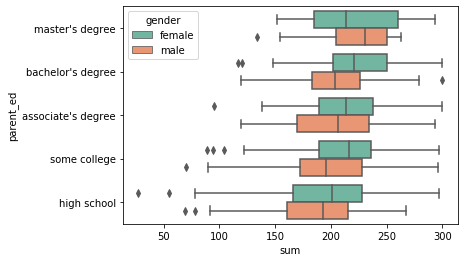

In [19]:
sns.boxplot(x="sum", y="parent_ed", data=df,order=asc,palette="Set2",hue="gender")
#df.groupby(["gender","parent_ed"])["write"].describe()

## Analysis of effect of parent's education level on children's marks
An **expected trend** which can be inferred from the above data is that **children whose parent's level of education is higher, perform better than the ones whose parents' education is comparitively lower. This trend is observed across all subjects and also in total aggregate marks.**
The mean total for students shose parent''s have a master's degree is 220.79 whereas for students whose parents' are just high school graduates is 189.29.

# Effect of group/race on education

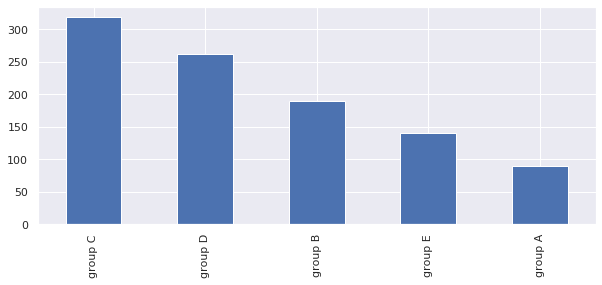

In [62]:
df.race.value_counts().plot(kind="bar")
asc=["group A","group B","group C","group D","group E"]

### Effect on math scores

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,61.629213,14.523008,28.0,51.00,61.0,71.0,100.0
group B,190.0,63.452632,15.468191,8.0,54.00,63.0,74.0,97.0
group C,319.0,64.463950,14.852666,0.0,55.00,65.0,74.0,98.0
group D,262.0,67.362595,13.769386,26.0,59.00,69.0,77.0,100.0
group E,140.0,73.821429,15.534259,30.0,64.75,74.5,85.0,100.0


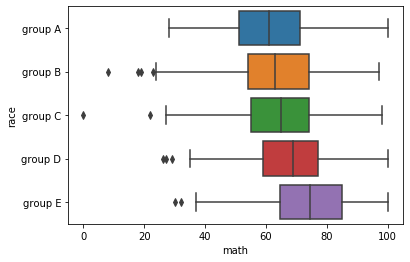

In [21]:
sns.boxplot(x="math",y="race",data=df,order=asc)
df.groupby("race")["math"].describe()

### Effect on reading scores

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,64.674157,15.543762,23.0,53.00,64.0,74.00,100.0
group B,190.0,67.352632,15.177499,24.0,56.00,67.0,79.75,97.0
group C,319.0,69.103448,13.997033,17.0,60.00,71.0,78.50,100.0
group D,262.0,70.030534,13.895306,31.0,60.25,71.0,79.00,100.0
group E,140.0,73.028571,14.874024,26.0,63.00,74.0,84.00,100.0


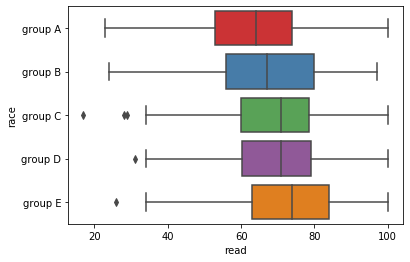

In [22]:
sns.boxplot(x="read", y="race", data=df,order=asc,palette="Set1")
df.groupby("race")["read"].describe()

### Effect on writing scores

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,62.674157,15.468278,19.0,51.00,62.0,73.00,97.0
group B,190.0,65.600000,15.625173,15.0,55.25,67.0,78.00,96.0
group C,319.0,67.827586,14.983378,10.0,57.00,68.0,79.00,100.0
group D,262.0,70.145038,14.367707,32.0,61.00,72.0,80.00,100.0
group E,140.0,71.407143,15.113906,22.0,62.00,72.0,80.25,100.0


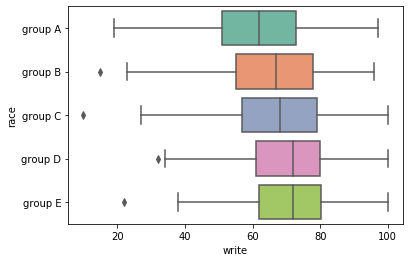

In [23]:
sns.boxplot(x="write", y="race", data=df,order=asc,palette="Set2")
df.groupby("race")["write"].describe()

### Effect on total aggregate scores

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
group A,89.0,188.977528,43.333794,70.0,156.0,184.0,219.00,289.0
group B,190.0,196.405263,44.196399,55.0,170.0,195.0,230.50,290.0
group C,319.0,201.394984,41.616633,27.0,173.0,205.0,231.00,296.0
group D,262.0,207.538168,39.758327,93.0,181.0,210.0,235.75,297.0
group E,140.0,218.257143,43.695047,78.0,194.0,220.5,247.25,300.0


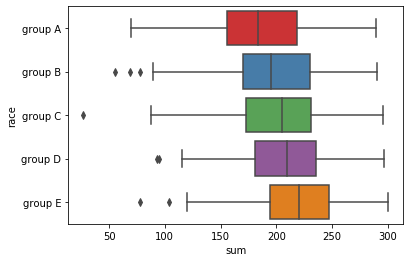

In [24]:
sns.boxplot(x="sum", y="race", data=df,order=asc,palette="Set1")
df.groupby("race")["sum"].describe()

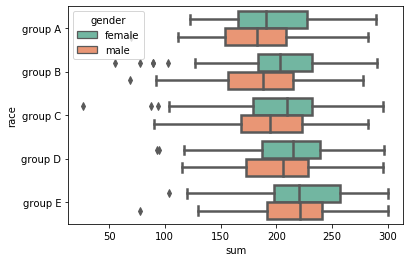

In [25]:
# girls of all races performing better 
sns.boxplot(x="sum", y="race", data=df,order=asc,palette="Set2",hue="gender",linewidth=2.5)

## Analysis of effect of race
It is quite evident from above plots that the average performance of children in any subject (be it maths,reading,writing or in aggregate) is in the following order (from best to worst) :
**gr E > gr D > gr C > gr B > gr A.
The median as well as the mean of scores of children in all subjects decreases alphabetically from E to A.**
This leads to the conclusion that technique, strategy etc of the groups are variable.

**Also, from the boxplot involving "gender" and "race" together, it would be fair to conclude that females of a race on average perform better than the males of the same race.**

# Effect of lunch on marks

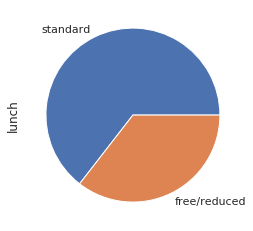

In [61]:
df.lunch.value_counts().plot(kind="pie")

<h3> Effect on math marks</h3>

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,58.921127,15.159956,0.0,49.0,60.0,69.0,100.0
standard,645.0,70.034109,13.653501,19.0,61.0,69.0,80.0,100.0


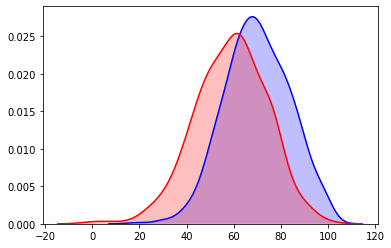

In [27]:
sns.kdeplot(df.loc[(df["lunch"]=="standard")]['math'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["lunch"]=="free/reduced")]['math'],shade=True,color='r',legend=False)
df.groupby("lunch")["math"].describe()

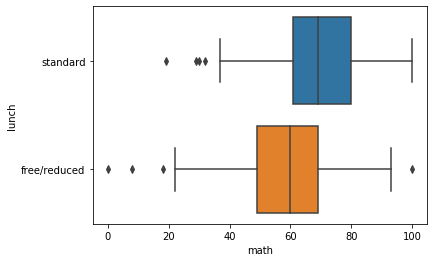

In [28]:
sns.boxplot(x="math",y="lunch",data=df)

<h3> Effect on reading marks</h3>

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,64.653521,14.895339,17.0,56.0,65.0,75.0,100.0
standard,645.0,71.654264,13.830602,26.0,63.0,72.0,82.0,100.0


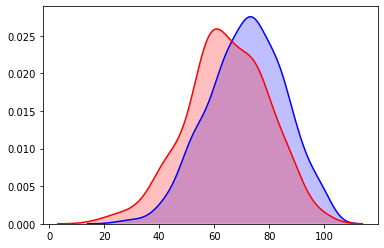

In [29]:
sns.kdeplot(df.loc[(df["lunch"]=="standard")]['read'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["lunch"]=="free/reduced")]['read'],shade=True,color='r',legend=False)
df.groupby("lunch")["read"].describe()

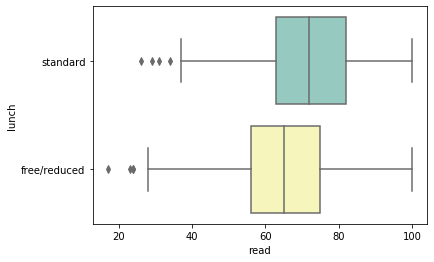

In [30]:
sns.boxplot(x="read",y="lunch",data=df,palette="Set3")

<h3> Effect on writing marks</h3>

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,63.022535,15.433823,10.0,53.0,64.0,74.0,100.0
standard,645.0,70.823256,14.339487,22.0,62.0,72.0,81.0,100.0


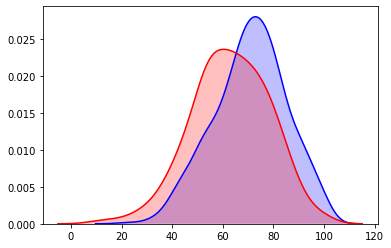

In [31]:
sns.kdeplot(df.loc[(df["lunch"]=="standard")]['write'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["lunch"]=="free/reduced")]['write'],shade=True,color='r',legend=False)
df.groupby("lunch")["write"].describe()

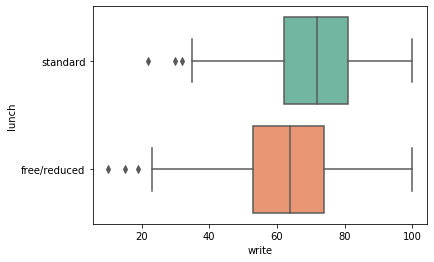

In [32]:
sns.boxplot(x="write",y="lunch",data=df,palette="Set2")

<h3> Effect on overall marks</h3>

,count,mean,std,min,25%,50%,75%,max
lunch,,,,,,,,
free/reduced,355.0,186.597183,43.374971,27.0,158.5,188.0,217.5,293.0
standard,645.0,212.511628,39.559515,78.0,187.0,214.0,239.0,300.0


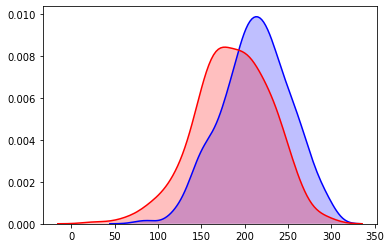

In [33]:
sns.kdeplot(df.loc[(df["lunch"]=="standard")]['sum'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["lunch"]=="free/reduced")]['sum'],shade=True,color='r',legend=False)
df.groupby("lunch")["sum"].describe()

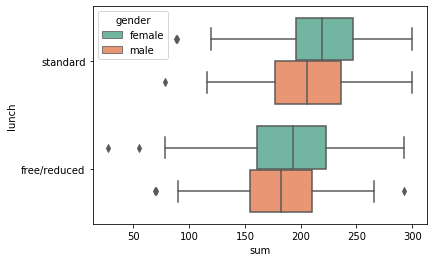

In [34]:
sns.boxplot(x="sum",y="lunch",data=df,palette="Set2",hue="gender")

## Analysis of effect of lunch on performance of students
It is quite evident from the above graph that **children who have a "standard lunch" perform much better** than the  ones with "free/reduced lunch" in all 3 subjects. The mean total for those **having _free/reduced lunch_ is 186.5** while for those with **_standard lunch" is 212.51._**

# Effect of course status on marks

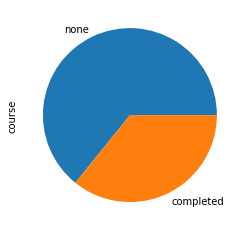

In [35]:
df.course.value_counts().plot(kind="pie")

<h3> Effect on math marks</h3>

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


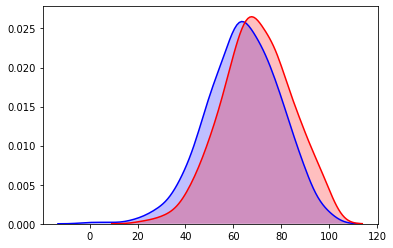

In [36]:
sns.kdeplot(df.loc[(df["course"]=="none")]['math'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["course"]=="completed")]['math'],shade=True,color='r',legend=False)
df.groupby("course")["math"].describe()

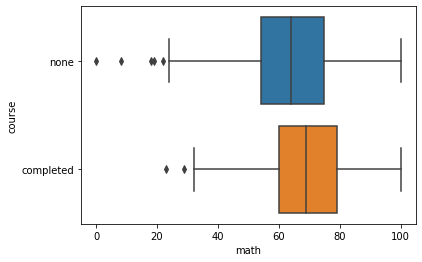

In [37]:
sns.boxplot(x="math",y="course",data=df)

<h3> Effect on reading marks</h3>

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0


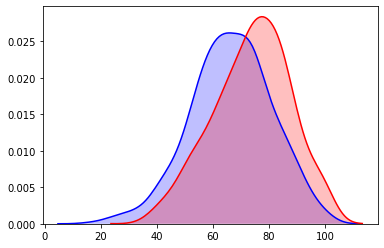

In [38]:
sns.kdeplot(df.loc[(df["course"]=="none")]['read'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["course"]=="completed")]['read'],shade=True,color='r',legend=False)
df.groupby("course")["read"].describe()

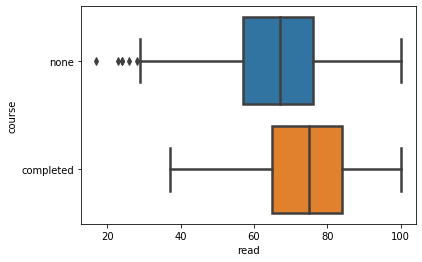

In [39]:
sns.boxplot(x="read",y="course",data=df,linewidth=2.5           )

<h3> Effect on writing marks</h3>

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


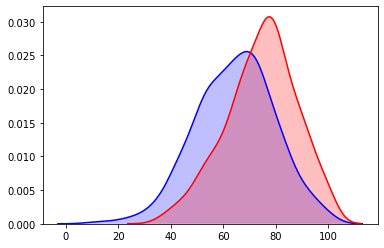

In [40]:
sns.kdeplot(df.loc[(df["course"]=="none")]['write'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["course"]=="completed")]['write'],shade=True,color='r',legend=False)
df.groupby("course")["write"].describe()

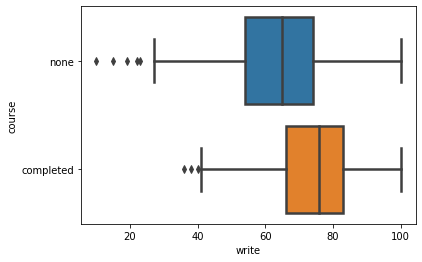

In [41]:
sns.boxplot(x="write",y="course",data=df,linewidth=2.5)

<h3> Effect on total marks</h3>

,count,mean,std,min,25%,50%,75%,max
course,,,,,,,,
completed,358.0,218.008380,39.110881,103.0,195.00,220.5,246.5,300.0
none,642.0,195.116822,42.560121,27.0,166.25,196.0,225.0,300.0


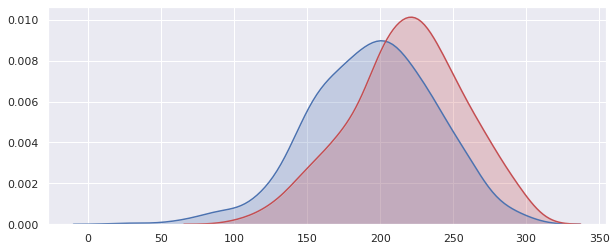

In [63]:
sns.kdeplot(df.loc[(df["course"]=="none")]['sum'],shade=True,color="b",legend=False)
sns.kdeplot(df.loc[(df["course"]=="completed")]['sum'],shade=True,color='r',legend=False)
df.groupby("course")["sum"].describe()

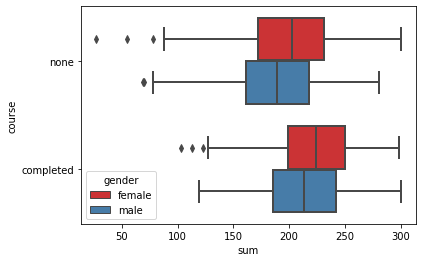

In [43]:
sns.boxplot(x="sum",y="course",data=df,hue="gender",palette="Set1",linewidth=2)


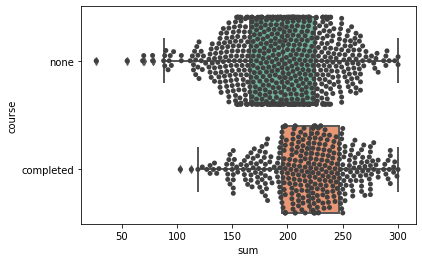

In [44]:
sns.swarmplot(x="sum",y="course",data=df,color=".25")
sns.boxplot(x="sum",y="course",data=df,palette="Set2",linewidth=2)

## Contrast in peformance in people who have completed the course Vs those who didn't
It is evident from the above plot that **people who have completed the course perform better on average, than those who didn't .** 
However, surprisingly, **the difference in marks is not as much as we would expect.**
So, we can infer that the course is not well-designed enough to improve students' performance. **The difference in corrsponding means in maths is about 5, that for reading scores is just 7 and that for writing scores is only 9.** However, the difference in scores increases in the sequence "maths","reading scores" and "writing scores".

# General Observations

# Relationship between marks in different subjects

## Insight 1: No subject liked or disliked unanimously by all students together

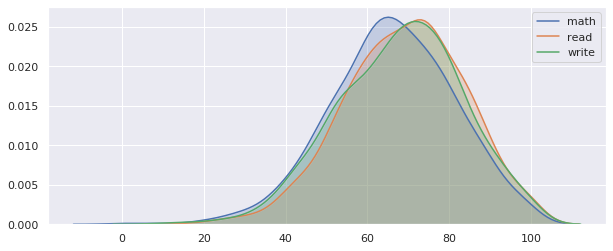

In [60]:
sns.kdeplot(df['math'],shade=True)
sns.kdeplot(df['read'],shade=True)
sns.kdeplot(df['write'],shade=True)

As can be seen above, there is no major difference in the curves of the 3 subjects. This shows that on average, all subjects are favoured equally by the students. There are certainly cases where a particular student may like one subject ad does not like the other. But there is no subject which is unanimously liked or disliked by all the students.

## Insight 2: Analysis of histograms

### Histogram for math marks
The distribution can be classified as a **"normal distribution"**. In a normal or "typical" distribution, points are as likely to occur on one side of the average as on the other. 

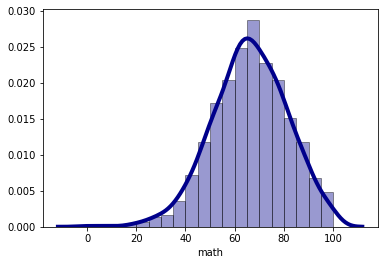

In [46]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df["math"], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Histogram for Reading marks
The distribution can be classified as a **"normal distribution"**. In a normal or "typical" distribution, points are as likely to occur on one side of the average as on the other. 

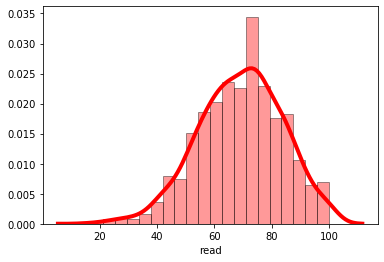

In [47]:
sns.distplot(df["read"], hist=True, kde=True, 
             bins=20, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


### Histogram for Writing marks
The histogram may be classified as a ***"bimodal" or "double peaked" distribution***.This indicates outcomes of two processes with different distributions are combined in one set of data. 
#### In this situation, it is likely that the  Writing paper was conducted in 2 sets of paper with questions of varying difficulty ie paper A had easy questions while paper B had comparitively tougher questions and hence, the peaks of the two papers do not coincide.

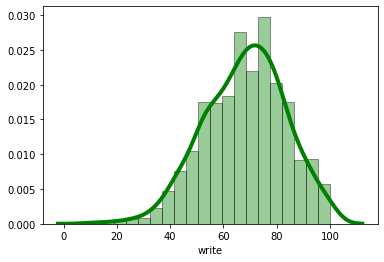

In [48]:
sns.distplot(df["write"], hist=True, kde=True,bins=20, color = 'green',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Insight 3: Pattern of marks of a particular student in all 3 subjects

In [49]:
df.corr()

,math,read,write,sum
math,1.000000,0.817580,0.802642,0.918746
read,0.817580,1.000000,0.954598,0.970331
write,0.802642,0.954598,1.000000,0.965667
sum,0.918746,0.970331,0.965667,1.000000


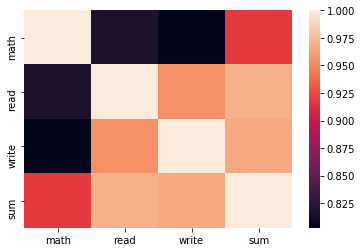

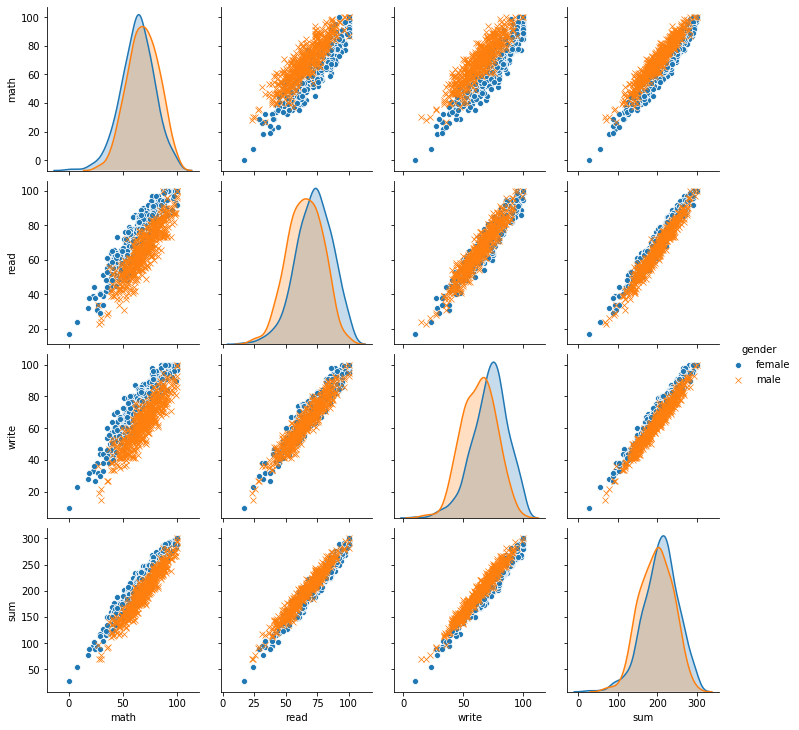

In [50]:
sns.heatmap(df.corr())
sns.pairplot(df, hue="gender", markers=["o", "x"])

### Analysis: 
From the heatmap, we can observe that the slopes for all possible correlations between the 3 subjects is **close to 1.** ****This shows that when a student performs well in one subject, he is likely to give a similar performance in another subject and vice-versa.****
In the below plots, we can see that all data points are very close to a hypothetical **y=x** line.
Also, there are **no data points at all which are very far away from the _y=x_ line.**
#### So, we conclude that there is not a single instance of a student who has performed extremely well in one subject but has performed badly in another.

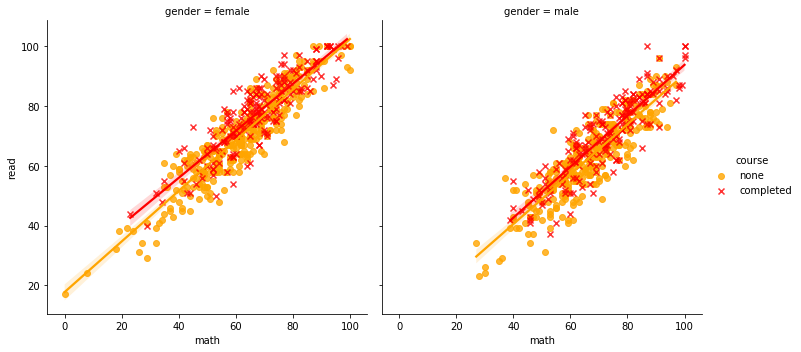

In [51]:
sns.lmplot('math','read',data=df,order=1,col="gender",hue="course",scatter=True,palette=dict(completed="red", none="orange"),markers=["o", "x"])

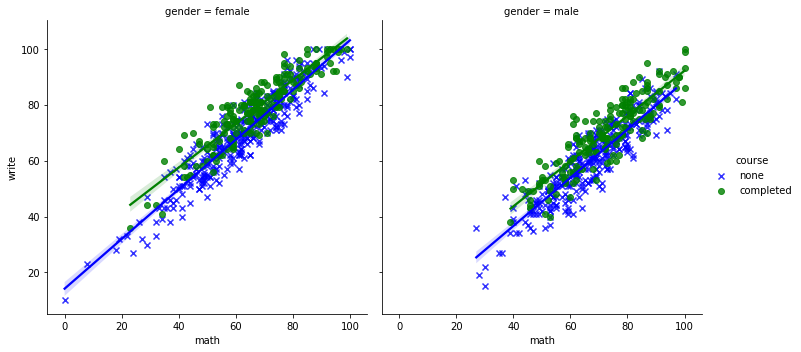

In [52]:
sns.lmplot('math','write',data=df,order=1,col="gender",hue="course",scatter=True,palette=dict(completed="green", none="blue"),markers=["x", "o"])

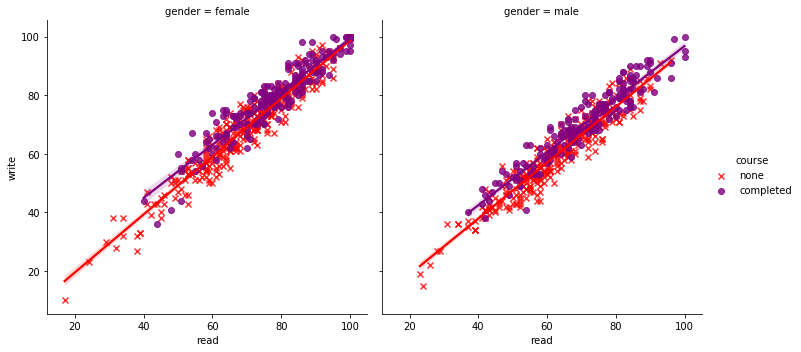

In [53]:
sns.lmplot('read','write',data=df,order=1,col="gender",hue="course",scatter=True,palette=dict(completed="purple", none="red"),markers=["x", "o"])

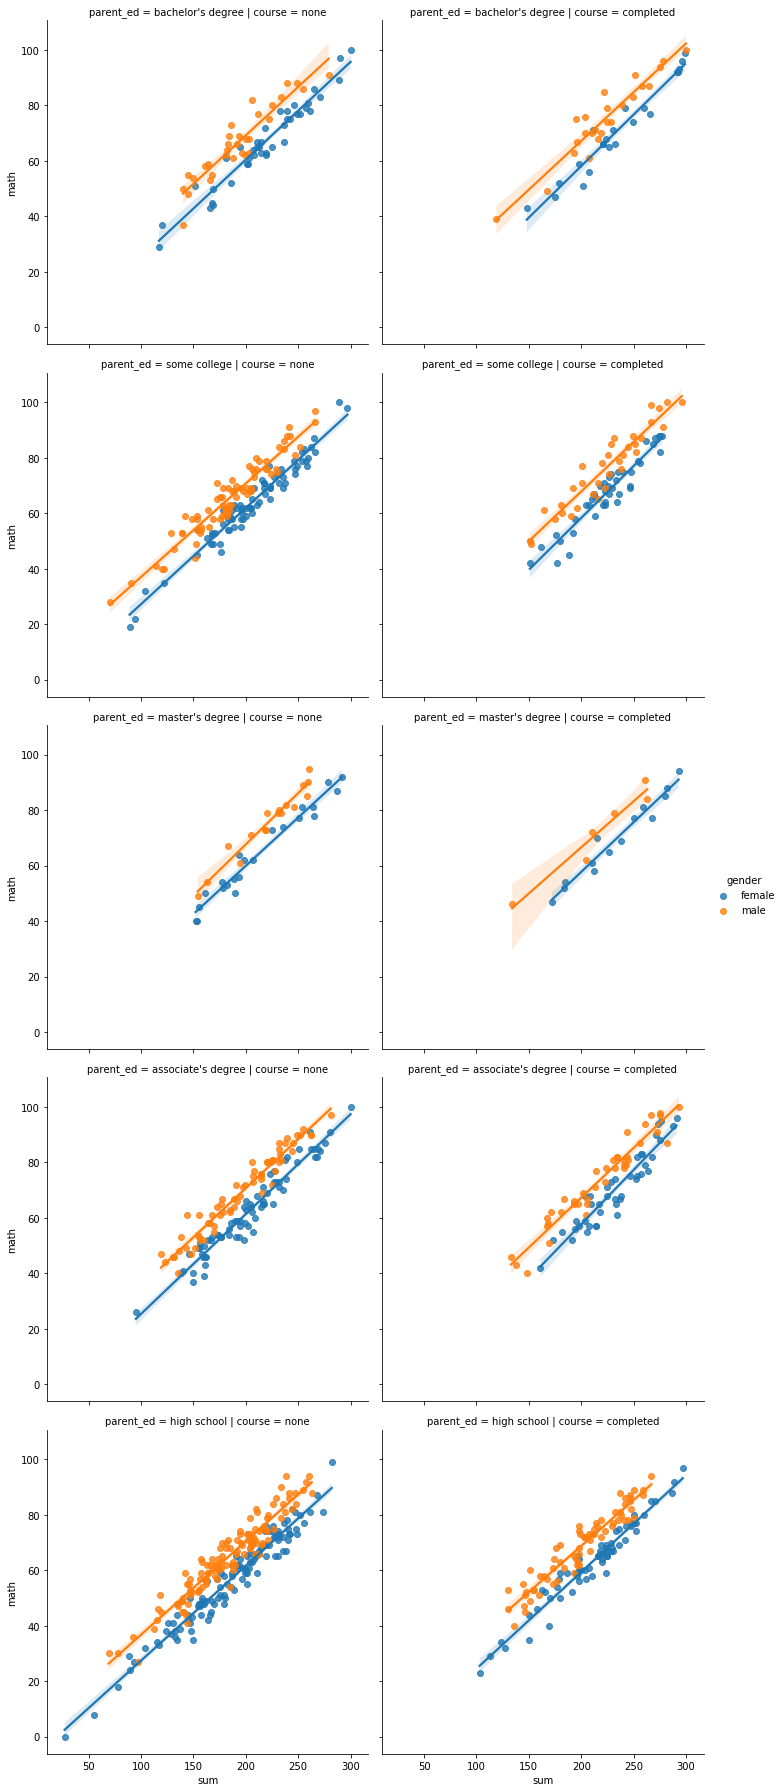

In [54]:
sns.lmplot('sum','math',data=df,order=1,row="parent_ed",col="course",hue="gender")

## Insight 4: Relation bewteen two variable factors

## Relation between parents' education and course completion rates

count        mean        std    min     25%  \
parent_ed          course                                                   
associate's degree completed   82.0  224.817073  37.146400  133.0  202.50   
                   none       140.0  199.271429  40.341856   95.0  166.75   
bachelor's degree  completed   46.0  228.717391  40.469831  119.0  204.75   
                   none        72.0  207.500000  40.850121  117.0  181.75   
high school        completed  133.0  205.015038  38.824583  103.0  179.00   
                   none       242.0  185.111570  43.233900   27.0  157.00   
master's degree    completed   20.0  228.950000  41.456985  134.0  208.75   
                   none        39.0  216.615385  40.359317  152.0  186.00   
some college       completed   77.0  223.961039  34.857017  151.0  201.00   
                   none       149.0  195.852349  40.954057   70.0  175.00   

                                50%     75%    max  
parent_ed          course                           
associate's degree completed  229.0  253.00  293.0  
                   none       199.5  227.25  300.0  
bachelor's degree  completed  224.5  256.25  300.0  
                   none       206.5  236.75  300.0  
high school        completed  207.0  233.00  297.0  
                   none       188.5  215.00  282.0  
master's degree    completed  229.0  261.50  293.0  
                   none       219.0  252.50  292.0  
some college       completed  226.0  248.00  296.0  
                   none       195.0  223.00  297.0

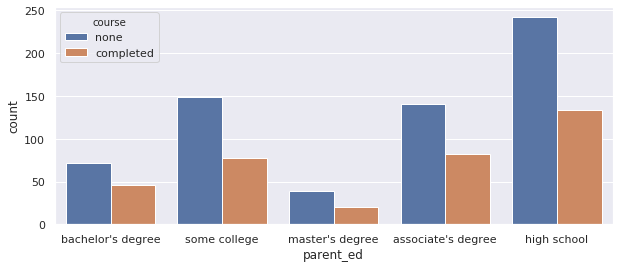

In [55]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="parent_ed",data=df,hue="course")
df.groupby(['parent_ed','course'])["sum"].describe()

Firstly, we notice that for any category of parents' education, children who have completed the course on average score better than the ones who didn't take the course. **However, an unexpected trend is that irrespective of parents' educational background, the proportion of students' completing the course VS the ones who didn't take the course stays fairly constant;
even though we expected that children of parents' having a higher educational background were more likely to have a higher course completion rate**

## Relation between race and course completion rates

count        mean        std    min     25%    50%     75%  \
race    course                                                                  
group A completed   31.0  210.193548  45.908909  123.0  174.50  219.0  241.50   
        none        58.0  177.637931  37.605383   70.0  154.25  178.0  201.00   
group B completed   68.0  211.926471  38.625765  103.0  190.75  212.0  243.25   
        none       122.0  187.754098  44.878589   55.0  157.25  188.5  219.75   
group C completed  117.0  215.606838  39.623434  113.0  193.00  218.0  242.00   
        none       202.0  193.163366  40.599831   27.0  168.25  197.0  219.75   
group D completed   82.0  220.597561  35.473468  119.0  198.00  223.0  240.25   
        none       180.0  201.588889  40.270425   93.0  171.00  206.0  229.75   
group E completed   60.0  230.083333  37.837427  133.0  205.00  230.5  254.00   
        none        80.0  209.387500  45.871724   78.0  182.50  212.0  237.25   

                     max  
race    course            
group A completed  289.0  
        none       279.0  
group B completed  278.0  
        none       290.0  
group C completed  296.0  
        none       281.0  
group D completed  297.0  
        none       297.0  
group E completed  300.0  
        none       300.0

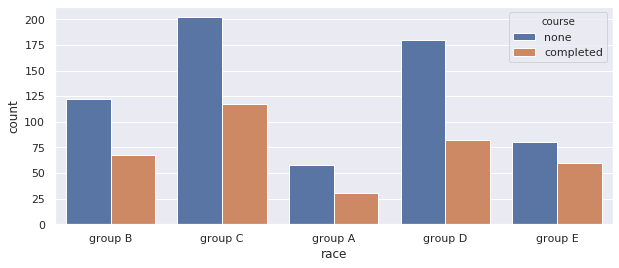

In [56]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="race",data=df,hue="course")
df.groupby(['race','course'])["sum"].describe()

Firstly, we notice irrespective of race, children who have completed the course on average score better than the ones who didn't take the course. However, an unexpected trend is that irrespective parents' educational background, the proportion of students' completing the course VS the ones who didn't take the course stays fairly constant.
### Group E is the only group where the difference in the students who complete the course and those who don't is not very high.###

# Miscellaneous plots

count        mean        std    min     25%    50%  \
race    lunch                                                              
group A free/reduced   36.0  172.972222  41.189101   70.0  147.00  168.0   
        standard       53.0  199.849057  41.690894  118.0  168.00  195.0   
group B free/reduced   69.0  182.927536  47.807617   55.0  157.00  186.0   
        standard      121.0  204.090909  40.215876   89.0  178.00  203.0   
group C free/reduced  114.0  181.236842  39.564510   27.0  160.25  183.5   
        standard      205.0  212.604878  38.462421   88.0  185.00  214.0   
group D free/reduced   95.0  194.000000  41.273349   93.0  163.50  195.0   
        standard      167.0  215.239521  36.826230  116.0  194.00  218.0   
group E free/reduced   41.0  202.487805  46.838618  104.0  167.00  210.0   
        standard       99.0  224.787879  40.809981   78.0  202.00  226.0   

                         75%    max  
race    lunch                        
group A free/reduced  201.75  250.0  
        standard      224.00  289.0  
group B free/reduced  220.00  268.0  
        standard      236.00  290.0  
group C free/reduced  208.75  268.0  
        standard      237.00  296.0  
group D free/reduced  224.00  293.0  
        standard      239.00  297.0  
group E free/reduced  235.00  293.0  
        standard      255.00  300.0

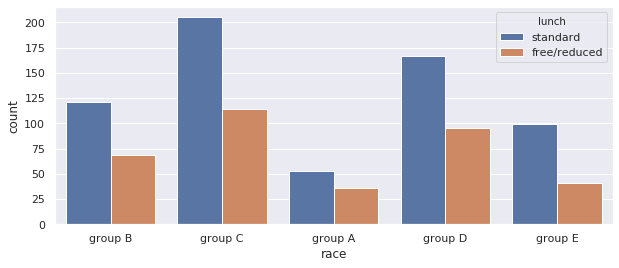

In [57]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x="race",data=df,hue="lunch")
df.groupby(['race','lunch'])["sum"].describe()

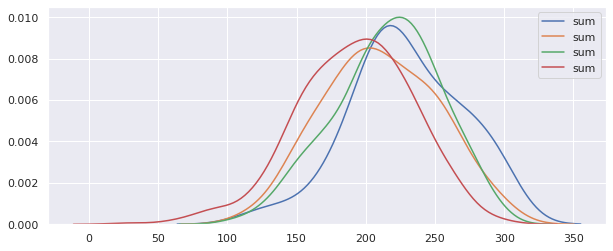

In [58]:
#Blue
sns.kdeplot(df.loc[(df["course"]=="completed")&((df["parent_ed"]=="master's degree")|(df["parent_ed"]=="bachelor's degree"))]["sum"],legend=True)
#Orange
sns.kdeplot(df.loc[(df["course"]=="none")&((df["parent_ed"]=="master's degree")|(df["parent_ed"]=="bachelor's degree"))]["sum"],legend=True)
#Green
sns.kdeplot(df.loc[(df["course"]=="completed")&((df["parent_ed"]!="master's degree")&(df["parent_ed"]!="bachelor's degree"))]["sum"],legend=True)
#Yellow
sns.kdeplot(df.loc[(df["course"]=="none")&((df["parent_ed"]!="master's degree")&(df["parent_ed"]!="bachelor's degree"))]["sum"],legend=True)

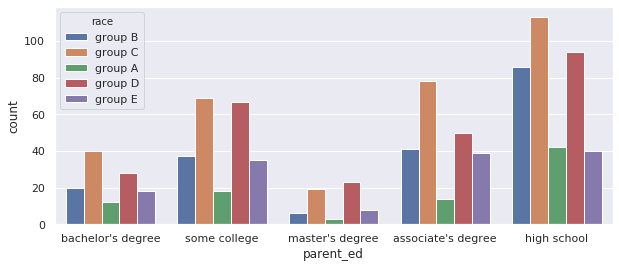

In [59]:
sns.countplot(x="parent_ed",data=df,hue="race")